## K-Means Clustering WholeSale Customers data

### Importing necessary libraries


In [19]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

print("Done..")

Done..


### Loading the data

In [20]:
customer_data = pd.read_csv('/home/bree/Documents/wholesale+customers/Wholesale customers data.csv')
customer_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [21]:
customer_data.shape

(440, 8)

In [22]:
customer_data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [23]:
customer_data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [24]:
X= customer_data.iloc[:,[2,3,4,5,6,7]]
print(X)

     Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0    12669   9656     7561     214              2674        1338
1     7057   9810     9568    1762              3293        1776
2     6353   8808     7684    2405              3516        7844
3    13265   1196     4221    6404               507        1788
4    22615   5410     7198    3915              1777        5185
..     ...    ...      ...     ...               ...         ...
435  29703  12051    16027   13135               182        2204
436  39228   1431      764    4510                93        2346
437  14531  15488    30243     437             14841        1867
438  10290   1981     2232    1038               168        2125
439   2787   1698     2510      65               477          52

[440 rows x 6 columns]


### Choosing the number of clusters

In [25]:
wcss = []

for i in range (1,11) :
    kmeans = KMeans(n_clusters=i,init= 'k-means++',random_state= 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

### Elbow plot for WCSS

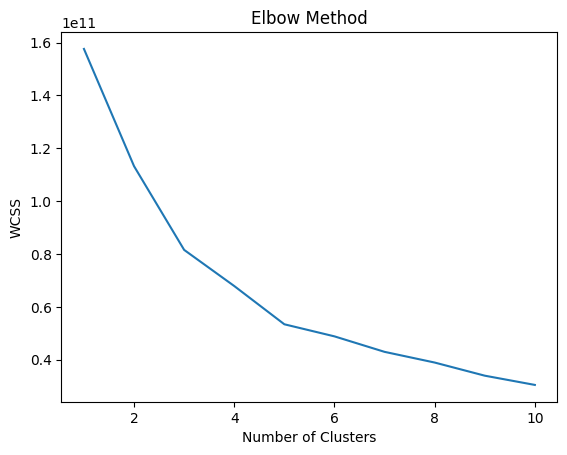

In [26]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### Training the K-Means Clustering Model

In [27]:
kmeans = KMeans(n_clusters=5,init= 'k-means++',random_state= 42)

# return a label for each data point based on their cluster
y = kmeans.fit_predict(X)
print(y)

[4 4 4 4 1 4 4 4 4 0 0 4 1 1 1 4 0 4 1 4 1 4 1 2 1 1 4 4 0 1 1 4 1 1 4 0 1
 0 0 3 1 1 0 0 4 0 0 2 4 0 4 4 1 0 1 4 0 0 4 4 4 2 4 0 4 2 4 1 4 4 1 1 4 1
 4 1 4 0 4 4 4 0 0 1 4 2 2 3 4 1 4 4 2 4 0 4 4 4 4 4 0 0 4 3 4 1 0 0 4 0 4
 0 1 4 1 4 4 4 1 4 1 4 4 4 1 3 1 1 4 1 4 4 4 4 4 4 4 4 4 4 1 1 1 4 1 0 4 4
 4 1 1 4 1 4 4 0 0 1 4 0 0 4 4 0 4 0 4 4 4 4 0 0 4 0 4 0 3 4 4 4 4 3 0 3 4
 4 4 4 0 0 1 4 4 0 4 1 1 0 4 4 0 0 1 4 4 0 4 4 4 0 1 2 4 4 0 0 0 1 0 4 4 0
 4 4 4 4 1 4 4 4 4 4 1 4 1 4 4 1 4 3 1 1 1 4 0 0 4 4 1 4 4 2 4 1 4 1 4 4 3
 3 4 4 1 4 0 0 0 1 0 4 4 4 4 1 4 4 1 4 4 1 4 4 3 1 3 1 4 1 1 1 4 4 4 0 1 4
 1 4 4 4 1 0 4 0 0 0 0 1 4 0 4 1 0 4 4 0 4 4 4 0 4 4 1 4 1 3 4 4 1 4 4 0 1
 2 1 1 4 4 4 4 4 0 4 0 4 4 0 1 4 0 4 0 4 0 4 4 1 0 4 4 1 4 4 4 4 4 4 4 1 4
 1 1 4 1 4 4 0 1 4 4 1 1 1 4 0 4 4 1 4 4 4 4 4 1 4 4 0 4 4 4 4 1 1 1 1 4 1
 0 4 4 4 4 0 4 4 4 0 4 0 4 0 1 1 1 1 4 0 1 4 4 0 4 1 4 1 1 1 0 4 4]


### Visualizing all the Clusters

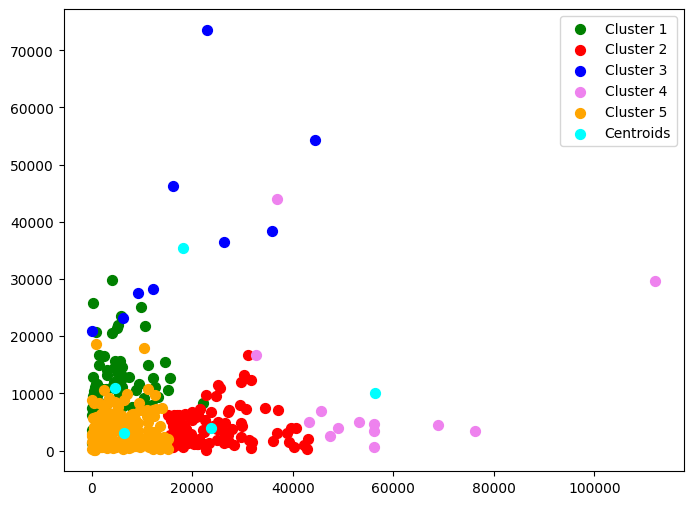

In [31]:
X = np.array(X)
y = np.array(y)

plt.figure(figsize=(8,6))

# Cluster 1
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], s=50, c='green', label='Cluster 1')
# Cluster 2
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], s=50, c='red', label='Cluster 2')
# Cluster 3
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], s=50, c='blue', label='Cluster 3')
# Cluster 4
plt.scatter(X[y == 3][:, 0], X[y == 3][:, 1], s=50, c='violet', label='Cluster 4')
# Cluster 5
plt.scatter(X[y == 4][:, 0], X[y == 4][:, 1], s=50, c='orange', label='Cluster 5')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='cyan', label='Centroids')

plt.legend()
plt.show()
